## Proyecto Final 2022
### Materia: Optimización Numérica.
### Título: Optimización de Portafolio.

Integrantes: 

Alberto Fuentes Chavarria

Ricardo Guillermo Granillo Alatorre

Sergio Sánchez Reyes

Leon Felipe Gomez Zarza


# Introducción: 

Existen muchas formas de crecer el patrimonio de un inversionista. Una de las formas más comunes que existen es el de invertir en el mercado financiero y más específicamente en el de Equity. Esto significará que el dicho inversionista tendrá que seleccionar acciones que coticen dentro de las Bolsas de valores. La pregunta natural que nace a partir de lo anterior es ¿Qué empresas deberá seleccionar el inversionista para que su dinero este realmente bien invertido? En este punto deberemos saber que existe una compensación entre el riesgo y el rendimiento, es decir, para aumentar el rendimiento esperado de la inversión, entonces el inversor debe estar dispuesto a tolerar mayores riesgos.  

# Teoría Moderna de Portafolio: 

Una vez planteado lo anterior se puede discutir el concepto de seleccionar el "mejor" portafolio. Esta definición del "mejor portafolio" fue estudiado con mucho éxito por el premio Nobel Harry Markowitz. Su modelo proporciona una manera de definir carteras que sean eficientes. Una cartera o portafolio eficiente es aquel que tiene el rendimiento más alto con un nivel de riesgo más bajo para una recompensa dada. 

Para ver cómo funciona esto imagina que hay cuatro activos en el mundo, A, B, C y D con cierto rendimiento y riesgo cada uno. Si pudiéramos comprar cualquiera de estos ¿cuál comprarías? ¿Elegirías A, B, C o D?. Qué pasaría si D tiene el mismo riesgo que B pero menos rendimiento. Por otro lado, si tiene el mismo rendimiento que C pero con mayor riesgo. Podemos descartar D. A lo anterior adicionemos que depende de las preferencias de riesgo de en inversionista, convirtiendo esto es una elección subjetiva.   

La teoría del portafolio estudia el cómo modelar la compensación dada una colección de n portafolios posibles con rendimientos $r_{i}$ para $i= 1, 2, . . . , n$. Los rendimientos $r_{i}$ generalmente no se conocen de antemano y, a menudo, se supone que son variables aleatorias que siguen una distribución normal.

# Metodología para Portafolio eficiente: 

Ya que suponemos que los rendimientos siguen una variable aleatoria $N(\mu, \sigma^2)$,  entonces el valor esperado de $r_{i}$ viene determinado por $\mu_{i}=E[r_{i}]$ y su varianza $\sigma_{i}^2=E[(r_{i} − \mu_{i})^2]$. La varianza mide las fluctuaciones de la variable $r_{i}$ con respecto a su media, de modo que valores mayores de $\sigma_{i}$ indican inversiones más riesgosas. Adicionalmente, debemos considerar que los rendimientos no son en general independientes. Podemos definir correlaciones entre pares de rendimientos de la siguiente manera:

$\rho=\frac{E[(r_{i} − \mu_{i})]E[(r_{j} − \mu_{j})]}{\sigma_{i}\sigma_{j}}$

Un inversionista selecciona una cantidad $w_{i}$ para cada uno de los activos en el portafolio $i$. Asumiendo las siguientes condiciones: 

a) No están permitidas las posiciones en corto. 

b) Todos los pesos de cada portafolio i deberán sumar 1: $\sum_{i}^n w_{i}=1$

Entonces el rendimiento de nuestro portafolio estará determinado por: 

R=$\sum_{i}^n w_{i} r_{i}=1$

Para medir el beneficio del portafolio, necesitamos el rendimiento esperado:

$E[R]=E[\sum_{i}^n w_{i}r_{i}]=\sum_{i}^n w_{i}E[r_{i}] =w^T\mu$

Por otro lado la varianza está determinada por:

$Var[R]= E[(r_{i} − \mu_{i})^2 \sum_{i}^n \sum_{j}^n w_{i} w_{j}\sigma_{i}\sigma_{j}\rho_{ij}=w^TGw$

Donde G es la matriz de varianza y covarianza semidefinida. 

De esta manera, lo que buscamos es encontrar un portafolio el cual tenga un rendimiento $w^{T}\mu$ alto, pero con una varianza $w^TGw$ lo más pequeña que sea posible. Combinando estas dos condiciones tenemos definido el siguiente problema de optimización:

$max (w^T\mu-\lambda w^TGw)$

sujeto a: 

$\sum_{i}^n w_{i} r_{i}=1$



# Implementación del Modelo.

In [1]:
import pandas as pd
import pandas_datareader.data as wb
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import seaborn as sns

## Lectura de Datos:

Implementaremos el método de optimización contemplando la construcción de un portafolio con 5 acciones. *Apple, Cisco Systems, IBM, Amazon y Disney.* 
Como primer paso obtendremos los rendimientos diarios de estas acciones de enero de 2018 hasta diciembre de 2022.

In [2]:
portafolio=['AAPL','CSCO','IBM','AMZN','DIS']
data = pd.DataFrame()
for t in portafolio:
    data[t]=wb.DataReader(t,'yahoo','2018-1-1')['Adj Close']
rendimientos =(data.pct_change())

## Máximizando portafolio   del Modelo: 

## Método de Optimización Utilizado:

Método: Sequential least squares.

EL método sequential least squares es un método iterativo para problemas no lineales de optimización restringidas. 
El problema parte de que la función puede ser aproximada como: $f(x)\approx f(x)+\nabla f(x^k)(x-x^k)+\frac{1}{2} (x-x^k)Hf(x^k)(x-x^k)$, con H como la Hessiana.

Sujeto a las funciones g y h por sus aproximaciones afines locales: 

$g(x)\approx g(x^k)+\nabla g(x^k)(x-x^k)$

$h(x)\approx h(x^k)+\nabla h(x^k)(x-x^k)$

Si el problema solo tiene restricciones de igualdad, entonces el método es equivalente a aplicar el método de Newton a las condiciones de optimalidad de primer orden, o condiciones de Karush-Kuhn-Tucker, del problema.

## Definiciones.

Establecemos las funciones que nos ayudaran a obtener los pesos óptimos (% a invertir en cada acción) para encontrar los portafolios con el mayor rendimiento dado cierto nivel de riesgos o viceversa.
Establecemos una matriz con los rendimientos $port rendimientos=w^T\mu$ ; también definimos la matriz de riesgo (varianza) $portriesgos=w^TGw$ donde G es la matriz de covarianza entre las acciones del portafolio.
Finalmente calculamos el cociente de sharpe (*Sharpe ratio*), definido como $sharpe=\frac{rendimiento}{riesgo}$

In [4]:
def portafolio_stats(pesos, rendimientos):
    '''
    portafolio_stats: Funcion que regresa los rendimientos, volatilidad y ratio sharpe de un conjunto de portafolios.
    :param pesos: Vector con el peso (%) asignado a cada acción del portafolio.
    :param rendimientos: Vector/Matriz con los rendimientos esperados anualizados para las acciones de un portafolio.
    '''
    port_rendimientos=np.sum(pesos*rendimientos.mean())*252
    port_riesgos=np.sqrt(np.dot(pesos.T,np.dot(rendimientos.cov()*252,pesos)))
    sharpe = port_rendimientos/port_riesgos
    return {'Rendimiento':port_rendimientos, 'Volatilidad':port_riesgos, 'Sharpe':sharpe}

def sum_pesos(pesos):
     '''
     sum_pesos: Función que restringe la suma de los pesos de todos los activos de cada portafolio sea igual a 1 .
     :param pesos: Vector con el peso (%) asignado a cada acción del portafolio.
     '''
    return pesos.sum()-1

def rend_esperado(pesos,E):
     '''
     rend_esperado: funcion que calucla el rendimiento esperado de un portafolio .
     :param pesos: Vector con el peso (%) asignado a cada acción del portafolio.
     :param rendimientos: Vector/Matriz con los rendimientos esperados anualizados para las acciones de un portafolio.
     '''
    return portafolio_stats(pesos,rendimientos)['Rendimiento']-E

def minimiza_sharpe(pesos, rendimientos):
     '''
      minimiza_sharpe: Funcion auxiliar para poder maximizar el ratio Sharpe. Regresa el ratio sharpe de los portafolios*-1
      :param pesos: Vector con el peso (%) asignado a cada acción del portafolio.
      :param rendimientos: Vector/Matriz con los rendimientos esperados anualizados para las acciones de un portafolio.
     '''
    return -portafolio_stats(pesos, rendimientos)['Sharpe']

def minimiza_riesgo(pesos):
     '''
      minimiza_riesgo: Funcion auxiliar para minimizar el riesgo. Regresa la volatilidad de un portafolio.
      :param pesos: Vector con el peso (%) asignado a cada acción del portafolio.
      :param rendimientos: Vector/Matriz con los rendimientos esperados anualizados para las acciones de un portafolio.
     '''
    return(portafolio_stats(pesos,rendimientos)['Volatilidad'])

Para el siguiente paso simulamos 8 mil portafolios sintéticos, utilizando pesos diferentes y calculando los rendimientos, riesgos y coeficientes de sharpe en cada simulación. 

In [3]:
port_rendimientos=[]
port_riesgos =[]

for i in range(8_000):
    num_acciones=len(portafolio)
    pesos = np.random.random(num_acciones)
    pesos /= np.sum(pesos)
    
    port_rendimientos.append(np.sum(pesos*rendimientos.mean())*252)
    port_riesgos.append(np.sqrt(np.dot(pesos.T,np.dot(rendimientos.cov()*252,pesos))))
    
port_rendimientos=np.array(port_rendimientos)
port_riesgos=np.array(port_riesgos)
sharpe =port_rendimientos/port_riesgos

# Gráficas: 

Ahora podemos observar cada uno de los posibles portafolios con el rendimiento esperado y el riesgo.

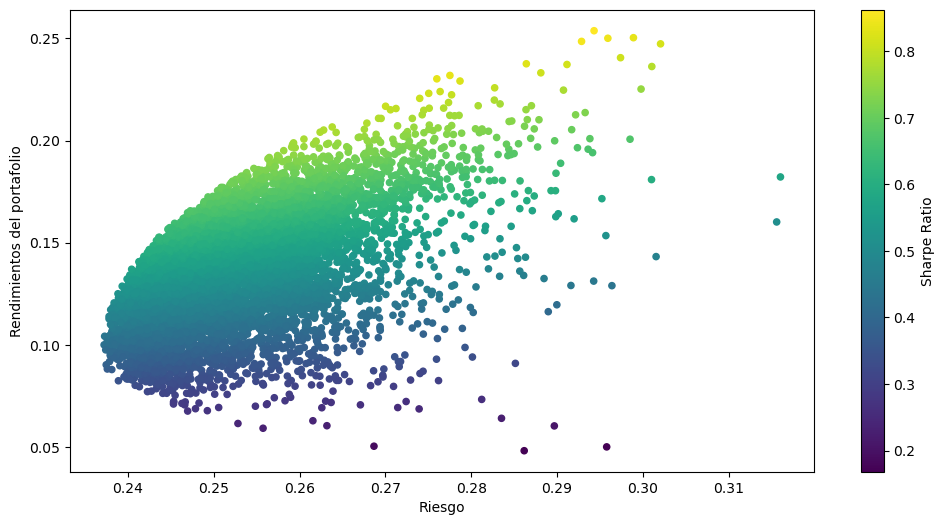

In [6]:
plt.figure(figsize=(12,6))
plt.scatter(port_riesgos, port_rendimientos,c=(sharpe), s=20)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Riesgo')
plt.ylabel('Rendimientos del portafolio')
plt.show()

Después de definir las restricciones de la suma de los pesos estrictamente igual a 1, dado que el peso de cada acción puede tomar valores de 0 a 1, podemos utilizar el método de *sequential least squares*  que se puede utilizar para resolver el problema de optimización.

In [ ]:
#Punto de partida del % de cada activo
pesos_iniciales = num_acciones * [1/num_acciones,]

#rango de valor que puede tomar el peso de cada actuvo y restricciones
bounds=((0.0,1),)*(num_acciones)
constraints=[{"type":"eq","fun":sum_pesos}]

optimal_sharpe = optimize.minimize(minimiza_sharpe, pesos_iniciales, method='SLSQP', args=(rendimientos,),bounds=bounds,constraints=constraints)
optimal_sharpe_pesos =optimal_sharpe['x'].round(3)
optimal_stats=portafolio_stats(optimal_sharpe_pesos,rendimientos)

Al utilizar este método, como podemos ver en la siguiente grafica es posible encontrar una frontera optima en la cual encontraremos un portafolio (pesos para cada acción) optimo donde para cada nivel de rendimiento dado se tiene puede obtener el menor riesgo. 

In [7]:
frontera_y=np.linspace(0.05,0.3,100)
frontera_x = []

for e in frontera_y:
    cons = ({'type':'eq', 'fun':sum_pesos},
           {'type':'eq', 'fun': lambda w:rend_esperado(w,e)})
    
    resultado = optimize.minimize(minimiza_riesgo,pesos_iniciales,method='SLSQP', bounds=bounds, constraints=cons)
    #optimize.minimize(minimiza_sharpe, pesos_iniciales, method='SLSQP', args=(rendimientos,),bounds=bounds,constraints=constraints)
    frontera_x.append(resultado['fun'])

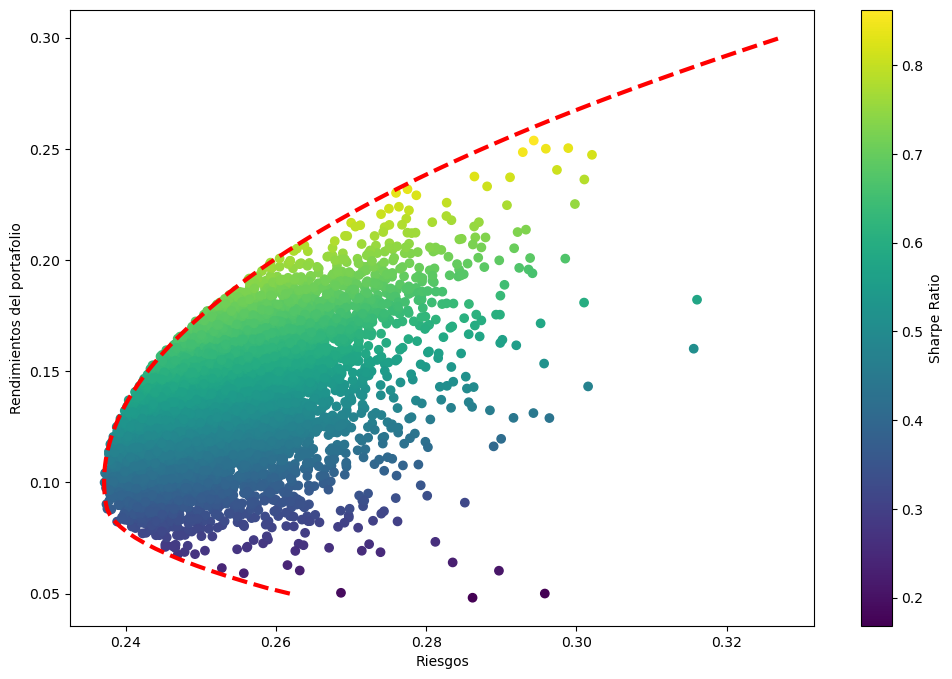

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(port_riesgos, port_rendimientos,c=(sharpe), cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Riesgos')
plt.ylabel('Rendimientos del portafolio')
plt.plot(frontera_x,frontera_y, 'r--', linewidth=3)
plt.show()

# Conclusiones: 

El método de portafolios de Markowitz presenta un problema de optimización convexa cuya solución puede ser obtenida a través de algoritmos computacionales como sequential least squares.
Este proceso permite encontrar opciones de portafolios que garanticen el mejor rendimiento al menor riesgo dadas ciertas condiciones sobre las acciones a considerar y las restricciones de pesos mínimos y máximos de inversión en cada una de ellas.

Bibliografía:

H.M.MARKOWITZ,Portfolioselection,JournalofFinance

Paul Wilmott On Quantitative Finance

Springer Series in Operations Research and Financial Engineering

https://plotly.com/python/v3/ipython-notebooks/markowitz-portfolio-optimization/

https://www.youtube.com/watch?v=p5pL8ZSeoN4
